In [14]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from openpyxl import Workbook
import pandas as pd
from bs4 import BeautifulSoup
import warnings 
warnings.filterwarnings('ignore')

In [15]:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()
a=input("유튜브명 : ")
url = "https://www.youtube.com/results?search_query={}".format(a)
driver.get(url)
driver.implicitly_wait(3)
time.sleep(6) 
driver.refresh() #광고제거
element = driver.find_element(By.ID, "text") 
element.click()
element = driver.find_element(By.LINK_TEXT, "동영상")
element.click()
time.sleep(3) 
last_height = driver.execute_script("return document.documentElement.scrollHeight")
num_scrolls = 4  
url_list = [] 

for i in range(num_scrolls): 
    #처음부터 끝까지 스크롤을 내려 해당내용 크롤링
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight)")
    time.sleep(1.5)
    # 스크롤을 내렸을 때 더 이상 내용이 없을 때
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    
    if new_height == last_height: 
        break
    
    html_source = driver.page_source  
    soup = BeautifulSoup(html_source, "html.parser")

# 동영상의 url이 포함된 요소를 찾기 
parent_elements = soup.find_all(class_ = 'yt-simple-endpoint style-scope ytd-playlist-thumbnail')
# 동영상의 요소의 href값을 추출해 저장하기
for parent_element in parent_elements:
    url = parent_element['href']
    url_list.append('https://www.youtube.com' + url)

# 저장된 url 리스트를 프린트 하시오
url_list=list(set(url_list))
print(url_list)

#유료 가입 광고 무시하기
try:
    driver.find_element_by_css_selector("#dismiss-button > a").click()
except:
    pass

유튜브명 : 빠니보틀
['https://www.youtube.com/watch?v=elz-Kf_PfJE', 'https://www.youtube.com/watch?v=wPLnAuHO4v0', 'https://www.youtube.com/watch?v=F87LlD4h7xI', 'https://www.youtube.com/watch?v=hWenvjHvScs', 'https://www.youtube.com/watch?v=FOzFmlwxeQE', 'https://www.youtube.com/watch?v=yvo9Jyg35y4', 'https://www.youtube.com/watch?v=gJe7hC3sRLY', 'https://www.youtube.com/watch?v=SJUV61WL4Zc', 'https://www.youtube.com/watch?v=Ig7guNyOxCI', 'https://www.youtube.com/watch?v=RJhZCnkAT04', 'https://www.youtube.com/watch?v=bc8KKCyHkj0', 'https://www.youtube.com/watch?v=EXqstawvwpo', 'https://www.youtube.com/watch?v=vjBT6h0wCRs', 'https://www.youtube.com/watch?v=V3q1Rab02W4', 'https://www.youtube.com/watch?v=yuTRi0USn_I', 'https://www.youtube.com/watch?v=fTul7E4ywM4', 'https://www.youtube.com/watch?v=ZA_mo7IfbI4', 'https://www.youtube.com/watch?v=a_Tv9_sr5Ps', 'https://www.youtube.com/watch?v=gAzIkeJVsic', 'https://www.youtube.com/watch?v=k9AGD9FGjiU', 'https://www.youtube.com/watch?v=6KubzC18Ybg', 

In [23]:
driver = webdriver.Chrome("chromedriver.exe")

urls=url_list[0:2]
id =[]
comment=[]

for url in urls:
    driver.get(url)
    
    driver.implicitly_wait(10)

    time.sleep(10)

    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    while True:
        driver.refresh() #광고제거
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(1.5)

        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    time.sleep(1.5)

    try:
        driver.find_element_by_css_selector("#dismiss-button > a").click()
    except:
            pass
        
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')

    id_list = soup.select("div#header-author > h3 > #author-text > span")
    comment_list = soup.select("yt-formatted-string#content-text")
    for i, j in zip(id_list,comment_list):
        id.append(i)
        comment.append(j)

In [24]:
comment

[<yt-formatted-string class="style-scope ytd-comment-renderer" id="content-text" slot="content" split-lines="" user-input="">어려운 상황에 도움을 주신 쿠스코 사랑채 식당 사장님께 감사 인사를 드립니다.</yt-formatted-string>,
 <yt-formatted-string class="style-scope ytd-comment-renderer" id="content-text" slot="content" split-lines="" user-input=""><span class="style-scope yt-formatted-string" dir="auto">가방 도둑 맞으셨다는 라이브 보고, 저라면</span><span class="style-scope yt-formatted-string" dir="auto">
 </span><span class="style-scope yt-formatted-string" dir="auto">진짜 멘붕와서 정신 못차렸을것 같은데</span><span class="style-scope yt-formatted-string" dir="auto">
 </span><span class="style-scope yt-formatted-string" dir="auto">마음다잡고 다시 일어나신 모습에</span><span class="style-scope yt-formatted-string" dir="auto">
 </span><span class="style-scope yt-formatted-string" dir="auto">진심어린 응원의 박수를 보냅니다!</span><span class="style-scope yt-formatted-string" dir="auto">
 </span><span class="style-scope yt-formatted-string" dir="auto">남은 기간 몸건강히 여행 마치시고</span><sp

In [27]:
#뽑아낸 정보 중 댓글만 추출하기
id_final = []
comment_final = []

for i in range(len(id)):
    temp_id = id[i].text
    temp_id = temp_id.replace('\n', '')
    temp_id = temp_id.replace('\t', '')
    temp_id = temp_id.replace('    ', '')
    id_final.append(temp_id) # 댓글 작성자

    temp_comment = comment[i].text
    temp_comment = temp_comment.replace('\n', '')
    temp_comment = temp_comment.replace('\t', '')
    temp_comment = temp_comment.replace('    ', '')
    comment_final.append(temp_comment) # 댓글 내용

In [31]:
comment_final

['어려운 상황에 도움을 주신 쿠스코 사랑채 식당 사장님께 감사 인사를 드립니다.',
 '가방 도둑 맞으셨다는 라이브 보고, 저라면진짜 멘붕와서 정신 못차렸을것 같은데마음다잡고 다시 일어나신 모습에진심어린 응원의 박수를 보냅니다!남은 기간 몸건강히 여행 마치시고안전하게 귀국하시길 바랍니다~',
 '진짜 힘든 상황을 겪으신건데 ㅠㅠ 남은 여정 포기하지 않으시고 계속해서 이어가시는 모습 너무 멋집니다  남은 여행 일정들 잘 진행하실 수 있기를 응원하겠습니다!!!',
 '사실 국내에서 지갑 잃어버려도 어떻게 해야하나 막막하고  깝깝한데.. 외국에서 그보다 더한 놑북이 든 가방을 두둑맞았을때 보틀형님의 심정은 상상도 못할거 같아요. .그래도  마음 다잡고 여행에 심기일전하는 모습에 한편으로는 짠하면서도 다른 한편으로는 멋있고 존경스럽다는 생각이 듭니다.위험하지않게 조심히 여행 끝나기를 응원하겠습니다',
 '아는사람 하나 없는 타지에서 고생 많으셨습니다 여행을 그만두시고 귀국하시는게 최선이라고 생각했는데 이상황에서도 "끝까지 달려보자"는 말씀이 참 인상깊고 멋지네요 얼마남지않은 이번 여행 무사히 마치시길 바랍니다 기다리시는 동안 정주행 한번 더 했네요ㅎㅎ 항상 영상보고 힐링하고 있습니다 감사합니다 새해 복 많이 받으시고 힘내세요!!',
 '힘드셨을텐데 이렇게 마음 잡으신거 보니 너무 대단해요!! 저도 동유럽에서 지갑 도난 당하고 멘붕 와서 진짜 뭘 구경했는지 기억도 안 나는데 빠니님 정말 대단합니다! 마지막까지 여행 잘 마치시고 무사히 돌아오시길 :)',
 '라이브 보고 깜짝놀랐는데 멘탈잡고 다시 달리시려는 모습에 감탄했습니다! 사실 한국으로 돌아올 생각도 있다고 하시는거 보고 살짝 아쉬웠지만 그래도 빠니님이 최우선이니 어쩔 수없다고 생각했는데 이렇게 계속 여행 하시는 모습을 볼 수있어서 넘나 기뻐요!! 항상 응원하고있겠습니다!!',
 '힘든 상황임에도.. 이렇게 여행을 계속 해주셔서 너무 감사해요  빠니님 영상 하나하나가.. 정말 제가 마치 여행하듯이.. 삶의 행복이

In [33]:
#엑셀에 댓글표 만들어 저장하기

# 저장된 내용을 아이디, 댓글 내용를 가지도록 dict으로 저장
pd_data = {"아이디" : id_final, "댓글 내용" : comment_final}

# 데이터 프레임으로 변환
youtube_pd = pd.DataFrame(pd_data)

# 데이터를 xlsx로 저장 index=False 데이터의 순서 번호 제거
youtube_pd.to_excel("yo.xlsx", index=False)
df = pd.read_excel("yo.xlsx")
df.to_csv("yo.csv ", index=False, encoding="utf-8-sig")

In [34]:
df["아이디"]

0       빠니보틀 Pani Bottle
1           Bum Chul Kim
2         한타스틱 Hantastic
3                   ro j
4                    리바이
5             sohee park
6             HYP Travel
7                   먹구누나
8                  낭만적이야
9                   푸른하늘
10                    진영
11              Hoon luo
12                 막걸리수액
13                     킴
14               yontube
15                   영원히
16               Noah _E
17                   라다임
18               lia_dad
19             solmi Kim
Name: 아이디, dtype: object

In [52]:
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if 'Nanum' in f.name:
        print(f.name, f.fname)

In [45]:
f.fname

'C:\\Windows\\Fonts\\GENISO.ttf'

In [51]:
# 폰트 경로 설정
font_path = 'C:/Users/USER/AppData/Local/Microsoft/Windows/Fonts/NanumSquareB.ttf'

In [70]:
# 불필요한 단어 제거하기
from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS)
stopwords.add("ㅋㅋ")
stopwords.add("ㅎㅎ")
stopwords.add("너무")
stopwords.add("진짜")
stopwords.add("와")

In [53]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [71]:
with open("stopwords.txt", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# CSV 파일을 pandas 데이터프레임으로 읽어옴
#df = pd.read_csv('파일이름.csv',encoding='utf-8')

# 댓글 내용이 저장된 컬럼 선택
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))

# 모든 댓글 내용을 하나의 문자열로 결합
text = ' '.join(new_list)

In [73]:
text

'어려운 상황에 도움을 주신 쿠스코 사랑채 식당 사장님께 감사 인사를 드립니다. 가방 도둑 맞으셨다는 라이브 보고, 저라면진짜 멘붕와서 정신 못차렸을것 같은데마음다잡고 다시 일어나신 모습에진심어린 응원의 박수를 보냅니다!남은 기간 몸건강히 여행 마치시고안전하게 귀국하시길 바랍니다~ 진짜 힘든 상황을 겪으신건데 ㅠㅠ 남은 여정 포기하지 않으시고 계속해서 이어가시는 모습 너무 멋집니다  남은 여행 일정들 잘 진행하실 수 있기를 응원하겠습니다!!! 사실 국내에서 지갑 잃어버려도 어떻게 해야하나 막막하고  깝깝한데.. 외국에서 그보다 더한 놑북이 든 가방을 두둑맞았을때 보틀형님의 심정은 상상도 못할거 같아요. .그래도  마음 다잡고 여행에 심기일전하는 모습에 한편으로는 짠하면서도 다른 한편으로는 멋있고 존경스럽다는 생각이 듭니다.위험하지않게 조심히 여행 끝나기를 응원하겠습니다 아는사람 하나 없는 타지에서 고생 많으셨습니다 여행을 그만두시고 귀국하시는게 최선이라고 생각했는데 이상황에서도 "끝까지 달려보자"는 말씀이 참 인상깊고 멋지네요 얼마남지않은 이번 여행 무사히 마치시길 바랍니다 기다리시는 동안 정주행 한번 더 했네요ㅎㅎ 항상 영상보고 힐링하고 있습니다 감사합니다 새해 복 많이 받으시고 힘내세요!! 힘드셨을텐데 이렇게 마음 잡으신거 보니 너무 대단해요!! 저도 동유럽에서 지갑 도난 당하고 멘붕 와서 진짜 뭘 구경했는지 기억도 안 나는데 빠니님 정말 대단합니다! 마지막까지 여행 잘 마치시고 무사히 돌아오시길 :) 라이브 보고 깜짝놀랐는데 멘탈잡고 다시 달리시려는 모습에 감탄했습니다! 사실 한국으로 돌아올 생각도 있다고 하시는거 보고 살짝 아쉬웠지만 그래도 빠니님이 최우선이니 어쩔 수없다고 생각했는데 이렇게 계속 여행 하시는 모습을 볼 수있어서 넘나 기뻐요!! 항상 응원하고있겠습니다!! 힘든 상황임에도.. 이렇게 여행을 계속 해주셔서 너무 감사해요  빠니님 영상 하나하나가.. 정말 제가 마치 여행하듯이.. 삶의 행복이에요  이대로 멈추나 했는데 다시 같이 가게되서 너무

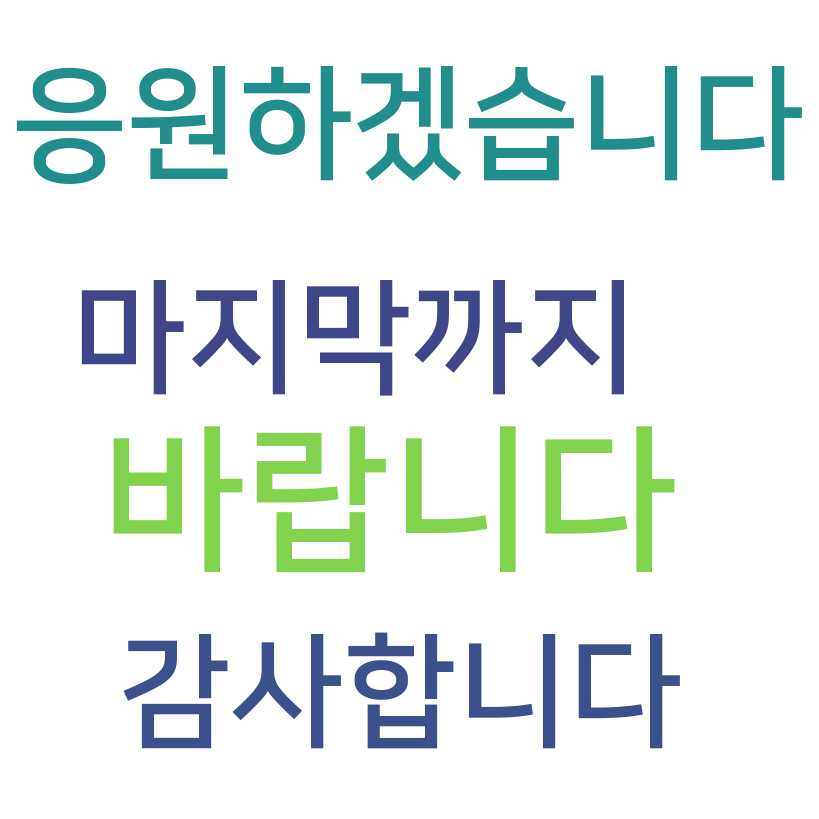

In [74]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=800, height=800,
                      background_color='white',stopwords=stopwords, min_word_length=4).generate(text)

# 단어의 빈도 계산
wordcloud.generate_from_frequencies(wordcloud.process_text(text.lower()))
word_freq = wordcloud.process_text(text.lower())

# 워드 클라우드 출력
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# 파일로 저장
plt.savefig('wordcloud.png')


In [78]:
##문제 정답

# 해당 숫자보다 낮은 빈도의 단어를 도출함
word_num = {}
for word, freq in word_freq.items():
    if freq < 3: # 해당 단어의 빈도수 보다 낮은 단어 도출
        word_num[word] = freq

# 낮은 빈도의 단어를 프린트함
for word, frequency in word_num.items():
    print(("{}: {}").format(word, frequency))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [ ]:
def train_sentiment_analysis_model(positive_file, negative_file):
    # 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()

    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()

    # 긍정적인 문장과 부정적인 문장을 학습 데이터로 생성합니다.
    positive_sentences = [" ".join(positive_words)] * len(positive_words)
    negative_sentences = [" ".join(negative_words)] * len(negative_words)

    # 학습 데이터와 레이블을 생성합니다.
    X = positive_sentences + negative_sentences
    y = [1] * len(positive_sentences) + [0] * len(negative_sentences)

    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b") 
    X = vectorizer.fit_transform(X)

    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB()
    clf.fit(X, y)

    return vectorizer, clf

In [ ]:
import itertools
import numpy as np

pos_list = []
neg_list = []
positive_list=[]
negative_list=[]
pos_convert=[]
neg_convert=[]

def train_sentiment_analysis_model(positive_file, negative_file):
    # 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()

    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()

    max_permutations = 20

    pos_per = list(itertools.islice(itertools.permutations(positive_words), max_permutations))
    neg_per = list(itertools.islice(itertools.permutations(negative_words), max_permutations))

    for p in positive_sentences:
        pos_list.append(list(p))

    for i in range(0,len(pos_list)):
        a=[" ".join(pos_list[i])]
        positive_list.append(a)

    for num in positive_list:
        pos_convert.append(num[0])
    
    for n in negative_sentences:
        neg_list.append(list(n))

    for i in range(0,len(neg_list)):
        a=[" ".join(neg_list[i])]
        negative_list.append(a)

    for num in negative_list:
        neg_convert.append(num[0])

    # 학습 데이터와 레이블을 생성합니다.
    X = pos_convert + neg_convert
    y = [1] * len(pos_convert) + [0] * len(neg_convert)

    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b")
    X = vectorizer.fit_transform(X)
    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB()
    clf.fit(X, y)

    return vectorizer, clf

In [ ]:
def predict_sentiment_analysis(text, vectorizer, clf):
    # 입력된 텍스트를 벡터화합니다.
    X = vectorizer.transform([text])

    # 모델을 사용하여 감성을 예측합니다.
    y_pred = clf.predict(X)

    # 예측 결과에 따라 출력 메시지와 카운트 정보를 선택합니다.
    if y_pred[0] == 1:
        result = {"sentiment": "긍정적인 단어", "positive_count": 1, "negative_count": 0}
    else:
        result = {"sentiment": "부정적인 단어", "positive_count": 0, "negative_count": 1}

    # 입력된 텍스트에 포함된 긍정 단어와 부정 단어를 카운트합니다.
    for word in text.split():
        if word in positive_words:
            result["positive_count"] += 1
        elif word in negative_words:
            result["negative_count"] += 1

    return result

In [ ]:
with open('text/positive_words.txt', 'r',encoding='utf-8') as f:
    positive_words = f.read().splitlines()

with open('text/negative_words.txt', 'r',encoding='utf-8') as f:
    negative_words = f.read().splitlines()

In [ ]:
vectorizer, clf=train_sentiment_analysis_model("text/positive_words.txt","text/negative_words.txt")
text = input("분석할 문자열을 입력하세요: ")

predict_sentiment_analysis(text, vectorizer, clf)

In [ ]:
df = pd.read_csv("yo.csv", encoding='utf-8-sig')
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))

In [ ]:
##문제 정답
emotion = []
for comment in new_list:
    prediction = predict_sentiment_analysis(comment, vectorizer, clf)
    emotion.append(prediction['sentiment'])

df["감정"]=pd.DataFrame(emotion)